# Reports on Julia Set Activities

(JuliaSetActivityReport-1)=
## Julia Set Activity 1
Write a Python program to draw the Sierpinski gasket (perhaps by using binomial coefficients mod 2).

This turns out to be a very popular question, and there are several web tutorials and examples on the subject.  For instance, here is a [YouTube video](https://youtu.be/G2A_Yg-JXxY) and [here is another](https://youtu.be/ssK2Z9Opokc) (maybe more detailed) with a program that uses the Turtle package.  Some links show _recursive_ programs.

Sierpinski triangles are also part of [this free book](https://runestone.academy/ns/books/published/pythonds/index.html) by Miller and Radum.  Again we don't know those people; these links are the result of a Google search.  We just wanted to show you that there was a lot of stuff online about this.  

The [Wikipedia page](https://en.wikipedia.org/wiki/Sierpi%C5%84ski_triangle) is particularly good and has many references. It even connects to the Chaos Game, which we cover in our final unit.  Compared to the animations of that page, and of some of the external links, our little code below is pretty basic.  We used some ideas from [Robin Truax's video](https://youtu.be/5nuYD2M2AX8) and we chose not to do a _full_ Sierpinski triangle but rather a random sampling of it.  For basic code, we think that the result is pretty cool.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(2022)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0,0,1,1])


level = 7  
scales = np.zeros(level)
for i in range(level):
    scales[i] = 2**(-i-1)
numberpossible = 3**(level)
print( "Using {} levels".format(level))
Nsample = 1729 # Ramanujan's number, why not
print( "We will sample {} out of {} possible top vertices.".format(Nsample,numberpossible))
waterfall = np.transpose( np.array( [ [0,0], [1,0], [0,1]], dtype=float) )
v0 = np.array( [-0.5, -np.sqrt(3)/2] )  # These directions give equilateral triangles
v1 = np.array( [ 0.5, -np.sqrt(3)/2] )
p0 = np.array( [0,np.sqrt(3)/2] )


for k in range(Nsample):
        # Choose a random number base 3 with "level" trinary digits
        pick = rng.integers(low=0, high=3, size=level) # exclusive top range.  Sigh.
        # Matrix whose columns are the allowed waterfall coordinate choices
        A = np.transpose( np.array([waterfall[:,pick[i]] for i in range(level)], dtype=float) )
        xy = A.dot(scales) # Waterfall coordinates in binary
        vertx = p0 + xy[0]*v0 + xy[1]*v1
        lft = vertx + v0*2**(-level-1)
        rgt = vertx + v1*2**(-level-1)
        # Draw a triangle below the vertex
        plt.plot( [vertx[0],lft[0]], [vertx[1],lft[1]], 'k')
        plt.plot( [vertx[0],rgt[0]], [vertx[1],rgt[1]], 'k')
        plt.plot( [lft[0],rgt[0]], [lft[1],rgt[1]], 'k')

ax.set_xlim( [-0.5,0.5 ] )
ax.set_ylim( [0, np.sqrt(3)/2] )
plt.gca().set_aspect('equal')

plt.show()

{ref}`[Go back to Activity] <JuliaSetActivity-1>`

(JuliaSetActivityReport-2)=
## Julia Set Activity 2
Explore pictures of the binomial coefficients mod 4 (and then consult Andrew Granville's paper previously referenced).  Here we didn't have anything to add to that paper.

In [ ]:
import math as mth

ans  = mth.comb(15,8) # How to compute 15 choose 8 
ans4 = ans % 4        # How to get its remainder mod 4
print( ans, ans4 )

{ref}`[Go back to Activity] <JuliaSetActivity-2>`

(JuliaSetActivityReport-3)=
## Julia Set Activity 3
Investigate pictures (mod 2 or otherwise) of other combinatorial families of numbers, such as [Stirling Numbers](https://en.wikipedia.org/wiki/Stirling_number) (both kinds).  Try also "Eulerian numbers of the first kind" mod 3.

Talk about an open-ended activity.  There is an _infinite_ amount of information about Stirling numbers and other numbers; for instance the [Digital Library of Mathematical Functions Chapter 26](https://dlmf.nist.gov/26) lists a remarkable number of facts and links many references.  As one fractal fact, computing the Stirling cycle numbers mod 2 gives a Sierpinski gasket, but tilted to one side.  As just one thing, we chose to implement Stirling cycle numbers in Python in a way similar to the way Fibonacci numbers were naively implemented.  For a reference, we used [this handy paper](https://ieeexplore.ieee.org/iel7/7425657/7425822/07426062.pdf) but we really recommend that you look at Concrete Mathematics, by Graham, Knuth, and Patashnik.  The recurrence relation we implemented is

$$
\begin{bmatrix} 
n+1 \\
k
\end{bmatrix} 
= 
n \begin{bmatrix}
n \\
k
\end{bmatrix}
+ 
\begin{bmatrix}
n \\
k-1
\end{bmatrix}
$$

with initial conditions $[n,0] = 1$ if $n=0$ and $0$ otherwise, and $[n,n] = 1$.  This recurrence relation gives a triangular array.  These numbers are the _Stirling cycle numbers_ which count the number of permutations of $n$ objects having $k$ cycles.

In [ ]:
nmax = 8
StirlingCycles = [[1],[0,1]]
for n in range(2,nmax):
    prevrow = StirlingCycles[n-1]
    nextrow = [0]
    for k in range(1,n):
        tmp = (n-1)*prevrow[k] + prevrow[k-1]
        nextrow.append(tmp)
    nextrow.append(1)
    StirlingCycles.append(nextrow)
for n in range(nmax):
    print( StirlingCycles[n] )

In [ ]:
# Now do the same mod 2
nmax = 21
StirlingCycles = [[1],[0,1]]
for n in range(2,nmax):
    prevrow = StirlingCycles[n-1]
    nextrow = [0]
    for k in range(1,n):
        tmp = ( (n-1)*prevrow[k] + prevrow[k-1] ) % 2  # The only change to the process
        nextrow.append(tmp)
    nextrow.append(1)
    StirlingCycles.append(nextrow)
for n in range(nmax):
    print( StirlingCycles[n] )

We've really just scratched the surface, here.  Note that brackets are needed for modular computations: `( blah ) % 2` is needed, or if the modulus is complicated, `( blah ) % ( bug-ugly-modulus )`.

{ref}`[Go back to Activity] <JuliaSetActivity-3>`

(JuliaSetActivityReport-4)=
## Julia Set Activity 4

Write a Python program to animate Newton's method for real functions and real initial estimates in general (the animated GIF at the top of this vignette was produced by a Maple program, Student:-Calculus1:-NewtonsMethod, which is quite a useful model).  This exercise asks you to "roll your own" animation.  At least, write Python code to draw the basic lines in the figure above.

Animation turns out to be complicated, when you think about the three things "Python", "Jupyter notebook", and "Jupyter Book".  [Here is a link to the documentation,](https://matplotlib.org/stable/gallery/animation/simple_anim.html) [ and a blog post ](http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/) and [some more information](https://jupyterbook.org/en/stable/interactive/interactive.html). 

The documentation example alone has several new aspects to it. To help you get started, we do some preliminary programming.  We consider (as with the figure) the function $y = x^2 + 1$, and we write down explicitly the $3$-periodic orbit that we want to animate.  If we start at $x_0 = \cot \pi/7 \approx 2.07652139657233$, then it turns out that $x_1 = \cot 2\pi/7$ and $x_2 = \cot 4\pi/7$ and $x_3 = \cot 8\pi/7 = \cot \pi/7 = x_0$ and we have a periodic orbit.  So we want to draw  a vertical dashed line from $(x_0,0)$ to $(x_0,x_0^2+1)$.  Then draw a line from $(x_0, x_0^2+1)$ to $(x_1,0)$; then a vertical dashed line from $(x_1,0)$ to $(x_1, x_1^2+1)$; then a line from $(x_1,x_1^2+1)$ to $(x_2, 0)$; then a vertical dashed line to $(x_2,x_2^2+1)$; then a line from there to $(x_0,0)$, and then repeat.  We can begin by simply drawing all those lines. Now, we need to figure out how to get "animate" to draw these lines in sequence.

It looks like we need to instal ffmpeg to make it work in practice, but that (we think) takes us too far afield for such a simple animation.  We will stop here (sorry if you feel cheated&mdash;but if you can get it to work without too much further effort, drop us a line).

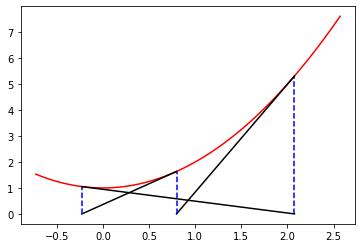

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

f = lambda x: x*x + 1

# x0 = np.cot(np.pi/7)  # Pathetically, there is no cotangent in NumPy

cot = lambda x: 1.0/np.tan(x)

x0 = cot(np.pi/7)
y0 = f(x0)
x1 = cot(2*np.pi/7)
y1 = f(x1)
x2 = cot(4*np.pi/7)
y2 = f(x2)

x = np.arange(x2-0.5,x0+0.5,0.01)
y = f(x)
basecurve = ax.plot( x, y, color='red' )
dash1 = ax.plot( [x0,x0], [0,y0], linestyle='dashed', color='blue' )
line1 = ax.plot( [x0,x1], [y0,0], color='black'  )
dash2 = ax.plot( [x1,x1], [0,y1], linestyle='dashed', color='blue' )
line2 = ax.plot( [x1,x2], [y1,0], color='black' )
dash2 = ax.plot( [x2,x2], [0,y2], linestyle='dashed', color='blue' )
line3 = ax.plot( [x2,x0], [y2,0], color='black' )
plt.show()


In [ ]:
# # Sadly, the following code does not work, issuing the error message
# # RuntimeError: Requested MovieWriter (ffmpeg) not available

# # We think we could fix it by installing ffmpeg, but we have not done so.

# rc('animation', html='html5')
# fig,ax = plt.subplots()

# f = lambda x: x*x + 1

# # x0 = np.cot(np.pi/7)  # Pathetically, there is no cotangent in NumPy

# cot = lambda x: 1.0/np.tan(x)

# x0 = cot(np.pi/7)
# y0 = f(x0)
# x1 = cot(2*np.pi/7)
# y1 = f(x1)
# x2 = cot(4*np.pi/7)
# y2 = f(x2)

# xdata = [[x0,x0],[x0,x1],[x1,x1],[x1,x2],[x2,x2],[x2,x0]]
# ydata = [[0,y0], [y0,0], [0,y1], [y1,0], [0,y2], [y2, 0]]

# ax.set_xlim((x2-0.5, x0+0.5))
# ax.set_ylim((0, y0+1))

# x = np.arange(x2-0.5,x0+0.5,0.01)
# y = f(x)
# line, = ax.plot( x, y, color='red' )

# # c   = ['black','blue']
# # sty = ['solid','dashed']

# # initialization function: plot the background of each frame
# def init():
#     line.set_data(x,y,color='red')
#     return (line,)

# # color=c[i % 2], linestyle=sty[i % 2]

# def animate(i):
#     line.set_data( xdata[i%6], ydata[i%6])  # update the data.
#     return (line,)

# anim = animation.FuncAnimation(fig, animate, init_func=init,
#                                frames=100, interval=20, blit=False )

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML, Image

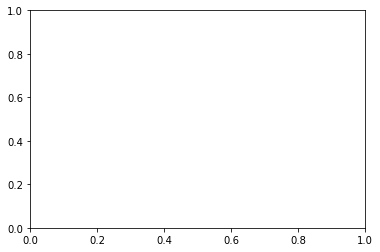

In [4]:
rc('animation', html='html5')
fig,ax = plt.subplots()

In [5]:
f = lambda x: x*x + 1

cot = lambda x: 1.0/np.tan(x)

x0 = cot(np.pi/7)
y0 = f(x0)
x1 = cot(2*np.pi/7)
y1 = f(x1)
x2 = cot(4*np.pi/7)
y2 = f(x2)

xdata = [[x0,x0],[x0,x1],[x1,x1],[x1,x2],[x2,x2],[x2,x0]]
ydata = [[0,y0], [y0,0], [0,y1], [y1,0], [0,y2], [y2, 0]]

(0.0, 6.311941110422728)

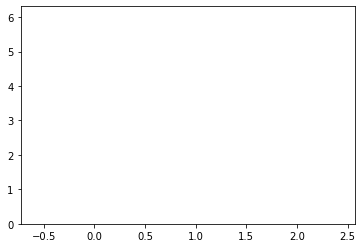

In [6]:
fig, ax = plt.subplots()
ax.set_xlim((x2-0.5, x0+0.5))
ax.set_ylim((0, y0+1))

In [7]:
x = np.arange(x2-0.5,x0+0.5,0.01)
y = f(x)
ax.plot(x, y, 'r')

line, = ax.plot([], [], lw=2)

In [8]:
def init():
    line.set_data([],[])
    return (line,)

def animate(i):
    line.set_data( xdata[i%6], ydata[i%6])  # update the data.
    return (line,)

In [9]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=50, blit=False)

In [10]:
anim.save('../Supplementary Material/Fractals and Julia Sets/animation.gif', writer='imagemagick', fps=1)

```{figure} ../Supplementary\ Material/Fractals\ and\ Julia\ Sets/animation.gif
---
height: 250px
name: newtonsmethodexercise
---
```

{ref}`[Go back to Activity] <JuliaSetActivity-4>`

(JuliaSetActivityReport-5)=

## Julia Set Activity 5

Take a few moments and write out (maybe using pen and ink, in a nice notebook) a bunch of questions about this material.  As always, don't worry about _answers_ just now.  The goal is _questions_, and more questions.

What is the _dimension_ of the boundary of the Newton fractal for $z^3-1$? How do you compute a dimension of a boundary, anyway? Which colouring scheme gives the most pleasing results? (We think the scheme in the notebook is pretty ugly; we hope you can do better).  Which fractal is hardest to compute?  Which is the simplest? Which is the most interesting to look at? What is the history of the fractal idea? Are there fractal _sounds_?  Fractals seem to be good models for trees, rivers, clouds, blood vessel networks, algae mats, lichen, ice crystals growing in water as it freezes, frost on the windowpane, lots of things; do they really tell us anything interesting about those real-life things?  There is lots of fractal art (again, see the [Bridges Math Art site](https://www.bridgesmathart.org/). How is it made?  What makes it _artistic_?  Is it art, if it's computer-generated?  (Some of the [Deep Dream art](https://en.wikipedia.org/wiki/DeepDream) makes us shudder)  What are the open mathematical questions about fractals?

{ref}`[Go back to Activity] <JuliaSetActivity-5>`

(JuliaSetActivityReport-6)=
## Julia Set Activity 6

Write your own code for computing Newton fractals, perhaps based on the code above (but at least improve the colour scheme).

In [ ]:
import numpy as np
import sympy
import cmath
from sympy.abc import x
from sympy.utilities.lambdify import lambdify, implemented_function
import colorsys
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

np.seterr(all='ignore')

def gen_colours(n):
    degree = 0
    start = 60
    space = 120
    flag = 0
    colours = []
    for i in range(n):
        if degree >= 360:
            if flag == 0:
                flag = 1
                degree = start
                start /= 2
            else:
                degree = start
                start /= 2
                space /= 2

        colours.append(degree/360.0)
        degree += space
    return colours

def gen_shade(colours, n_shade):
    col_len = len(colours)
    shade = np.linspace(170, 0, n_shade)
    list_shade = []
    for c in colours:
        temp = []
        for s in shade:
            if s <= 90.0:
                t = colorsys.hsv_to_rgb(c, 0.1+s/100.0, 1.0)
                temp.append(tuple(int(round(255*x)) for x in t))
            else:
                t = colorsys.hsv_to_rgb(c, 1.0, 1.0-(s - 90.0)/100.0)
                temp.append(tuple(int(round(255*x)) for x in t))
        list_shade.append(temp)
    return list_shade

def colours(n, n_shade):
    col = gen_colours(n)
    return gen_shade(col, n_shade)

def newton(func, dfunc, z, tol, max_iter):
    count = 0
    while (abs(func(z)) > tol) and (abs(func(z)/dfunc(z))/abs(z)) and (count < max_iter):
        if abs(func(z)) > 1e16:
            return (None, max_iter)
        z = z - func(z)/dfunc(z)
        count += 1
    if (count == max_iter):
        return (None, max_iter)
    else:
        return(z, count)

def fractal(func, dfunc, bl, ur, size, tol, max_i, converge_tol):
    roots = []
    max_iter = 0
    A = np.zeros((size[1], size[0], 3))
    for i in range(size[1]):
        y = i*(ur[1] - bl[1])/(size[1] - 1) + bl[1]
        for j in range(size[0]):
            x = j*(ur[0] - bl[0])/(size[0] - 1) + bl[0]
            (root, count) = newton(func, dfunc, complex(x, y), tol, max_i)
            if count > max_iter:
                max_iter = count
            if root:
                alreadyFound = False
                for test_root in roots:
                    if abs(test_root - root) < converge_tol:
                        root = test_root
                        alreadyFound = True
                        break
                if not alreadyFound:
                    roots.append(root)
            if root:
                A[i][j][0] = root.real
                A[i][j][1] = root.imag
                A[i][j][2] = count
    return (A, roots, max_iter)

def f_embed(M, **kwargs):
    filename = kwargs.get('filename', None)
    A = M[0]
    (size_y, size_x, temp) = A.shape
    roots = M[1] 
    n_shade = M[2]
    C = colours(len(roots), n_shade)
    img = Image.new("RGB", (size_x, size_y), (255, 255, 255))
    for y in range(size_y):
        for x in range(size_x):
            if A[y][x][0]:
                i = int(A[y][x][2])
                if i > n_shade - 1:
                    i = n_shade - 1     
                img.putpixel((x, size_y - y - 1), C[roots.index(complex(A[y][x][0], A[y][x][1]))][i])
    display(img)
    if filename != None:
        img.save(filename + ".png", "PNG")

def Newt_Fractal(func, bl, ur, size, **kwargs):
    i = kwargs.get('iterationlimit', 25)
    filename = kwargs.get('filename', None)
    tolerance = kwargs.get('tolerance', 1e-6)
    converge_tol = kwargs.get('converge_tolerance', 1e-3)
    dfunc = kwargs.get('derivative', None)
    if dfunc == None:
        dfunc = lambdify(x, sympy.diff(func(x), x), np)
    else:
        dfunc = lambdify(x, dfunc(x), np)
    func = lambdify(x, func(x), np)
    if type(size) == int:
        size = (size, size)
    M = fractal(func, dfunc, bl, ur, size, tolerance, i, converge_tol)
    print('This program found ' + str(len(M[1])) + ' roots.')
    roots = kwargs.get('printroots', False);
    if (roots == True):
        print('The roots are')
        print(M[1])
    if filename == None:
        f_embed(M)
    else:
        f_embed(M, filename = filename)

{ref}`[Go back to Activity] <JuliaSetActivity-6>`

(JuliaSetActivityReport-7)=
## Julia Set Activity 7

Compute Newton fractals for several functions of your own choosing. Test your code on the function $f(z) = z^{8}+4 z^{7}+6 z^{6}+6 z^{5}+5 z^{4}+2 z^{3}+z^{2}+z$ used above.

In [ ]:
f = lambda z: z**8+3*z**7+5*z**6+5*z**5+4*z**4+2*z**3+z*z+z
Newt_Fractal(f, (-1.8, -1.4), (1.0, 1.4), 500)

{ref}`[Go back to Activity] <JuliaSetActivity-7>`

(JuliaSetActivityReport-8)=
## Julia Set Activity 8

Compute Halley fractals for the same functions.

```python
df = lambda z: 8*z**7+21*z**6+30*z**5+25*z**4+16*z**36*z**2+2*z+1
halley = lambda z: f(z)/sympy.sqrt(df(z))
Newt_Fractal(halley, (-1.8, -1.4), (1.0, 1.4), 500)
```

{ref}`[Go back to Activity] <JuliaSetActivity-8>`

(JuliaSetActivityReport-9)=
## Julia Set Activity 9

Compute secant fractals for the same functions, using the $x_1 = x_0 - f(x_0)/f'(x_0)$ rule to generate the needed second 
initial estimate.  Try a different rule for generating $x_1$ and see if it affects your fractals.

In [ ]:
# A very short hacky program to draw the edges of a secant fractal
# RMC 2022.2.6
import numpy as np
from matplotlib import pyplot as plt
# We will take an N by N grid of initial estimates
N = 200  # 800 by 800 is a lot and it takes a few seconds to draw 
x = np.linspace(-2,2,N)
y = np.linspace(-2,2,N)
F = np.zeros((N,N))
# Here is the function and its derivative whose zeros we are looking for
f = lambda x: x ** 3 - 2;
df = lambda x: 3*x**2 ;
# SirIsaac performs one Newton iteration
SirIsaac = lambda x, fx: x - fx/df(x);
secantIter = lambda x,y,fx,fy: x - fx*(x-y)/(fx-fy)
for k in range(N):
    for i in range(N):
        # We range over all initial estimates in the grid
        z0 = x[i]+1j*y[k];
        f0 = f(z0)
        z1 = SirIsaac( z0, f0 )
        f1 = f(z1)
        # Hard-wire in 20 iterations (maybe not enough)
        for m in range(20):
            z = secantIter( z1, z0, f1, f0 )
            z0 = z1
            f0 = f1
            z1 = z
            if z1==z0:
                break
            f1 = f(z1)
        # After twenty iterations we hope the iteration has settled down, except on
        # the boundary between basins of attraction.
        # The phase (angle) is a likely candidate for a unique identifier for the root
        F[i,k] = np.angle( z )
# A magic incantation
X,Y = np.meshgrid( x, y )
# I admit to being quite puzzled as to why if we say X,Y in the call
# this contour plot has the real axis vertical, pointing up 
# and the imaginary axis horizontal (not sure which way it's pointing)
# so I have just empirically input Y,X to get the graph looking right.
plt.figure(figsize=(10,10))
plt.contourf( Y,X, F, levels=[-3,-2,0,2,3], colors=['brown','red','black','yellow','black','blue','black'] )
plt.gca().set_aspect('equal', adjustable='box')

{ref}`[Go back to Activity] <JuliaSetActivity-9>`

(JuliaSetActivityReport-10)=
## Julia Set Activity 10

Try a few different values of "c" in the Mandelbrot example above, and generate your own "Julia sets".

In [ ]:
import numpy as np
from numpy.polynomial import Polynomial as Poly
N = 10001
History = np.zeros(N,dtype=complex)
# History[0] is deliberately 0.0 for this example
#print( History[0 ])
here = 0
there = 1
c = [-0.73, 0, 1 ] # Try c=0.8 (Solution to Problem 1)
d = len(c)-1
while there <= N-d:
    cc = c.copy()
    cc[0] = c[0] - History[here]
    p = Poly( cc );
    rts = p.roots();
    #print(here, rts)
    for j in range(d):
        #print( j, rts[j], there )
        History[there] = rts[j];
        there += 1;
    here += 1;
    
import matplotlib.pyplot as plt
x = [e.real for e in History]
y = [e.imag for e in History]
plt.scatter( x, y, s=0.5, marker="." )
plt.show()

In [ ]:
N = 10001
History = np.zeros(N,dtype=complex)
# History[0] is deliberately 0.0 for this example
#print( History[0 ])
here = 0
there = 1
c = [-0.2-0.8j, 0, 1 ] # Try c=0.2+0.8j (Solution to Problem 1)
d = len(c)-1
while there <= N-d:
    cc = c.copy()
    cc[0] = c[0] - History[here]
    p = Poly( cc );
    rts = p.roots();
    #print(here, rts)
    for j in range(d):
        #print( j, rts[j], there )
        History[there] = rts[j];
        there += 1;
    here += 1;
    
import matplotlib.pyplot as plt
x = [e.real for e in History]
y = [e.imag for e in History]
plt.scatter( x, y, s=0.5, marker="." )
plt.show()

{ref}`[Go back to Activity] <JuliaSetActivity-10>`

(JuliaSetActivityReport-11)=
## Julia Set Activity 11

These are not really Julia sets; they include too much of the history!  Alter the program so that it plots only (say) the last half of the points computed; increase the number of points by a lot, as well.  Compare your figure to (say) the Maple Julia set for c=1.2.  

In [ ]:
N = 64001
History = np.zeros(N,dtype=complex)
# History[0] is deliberately 0.0 for this example
#print( History[0 ])
here = 0
there = 1
c = [-0.2-0.8j, 0, 1 ] # Try c=0.2+0.8j (Same as olution to Problem 1)
d = len(c)-1
while there <= N-d:
    cc = c.copy()
    cc[0] = c[0] - History[here]
    p = Poly( cc );
    rts = p.roots();
    #print(here, rts)
    for j in range(d):
        #print( j, rts[j], there )
        History[there] = rts[j];
        there += 1;
    here += 1;
    
import matplotlib.pyplot as plt
import math
x = [History[j].real for j in range(math.floor(63*N/64), N)] # Not just the last half, the last sixty-fourth
y = [History[j].imag for j in range(math.floor(63*N/64), N)]
plt.scatter( x, y, s=0.5, marker="." )
plt.show()

{ref}`[Go back to Activity] <JuliaSetActivity-11>`

(JuliaSetActivityReport-12)=
## Julia Set Activity 12

Change the function F to be a different polynomial; find places where both F and F' are zero (if any).  If necessary, change your polynomial so that there is such a "critical point".  Start your iteration there, and go backwards---plot your "Julia set".

In [ ]:
N = 3**10+1
History = np.zeros(N,dtype=complex)
# History[0] is deliberately 0.0 for this example
#print( History[0 ])
here = 0
there = 1
# Newton's method on f(z) = z^3-1 gives z_{n+1} = (2z_n^3 + 1)/(3z_n^2)
p = [1, 0, 0, 2 ] 
q = [0, 0, 3 ]
d = max( len(p), len(q) ) - 1
while there <= N-d:
    cc = Poly( p ) - History[here]*Poly( q ) # Python has polynomial arithmetic so this is simple
    rts = cc.roots();
    #print(here, rts)
    for j in range(d):
        #print( j, rts[j], there )
        History[there] = rts[j];
        there += 1;
    here += 1;
    
import matplotlib.pyplot as plt
x = [e.real for e in History]
y = [e.imag for e in History]
fractal = plt.figure(figsize=(8,8))
fractalax = plt.scatter( x, y, s=0.1, marker="." );
plt.xlim(-2,2);
plt.ylim(-2,2);


In [ ]:
N = 3**10+1
History = np.zeros(N,dtype=complex)
# History[0] is deliberately 0.0 for this example
#print( History[0 ])
here = 0
there = 1
# Halley's method on f(z) = z^3-1 gives z_{n+1} = z_n(z_n**3+2)/(2z_n^3+1)
p = [0, 2, 0, 0, 1 ] 
q = [1, 0, 0, 2 ]
d = max( len(p), len(q) ) - 1
while there <= N-d:
    cc = Poly( p ) - History[here]*Poly( q ) # Python has polynomial arithmetic so this is simple
    rts = cc.roots();
    #print(here, rts)
    for j in range(d):
        #print( j, rts[j], there )
        History[there] = rts[j];
        there += 1;
    here += 1;
    
import matplotlib.pyplot as plt
x = [e.real for e in History]
y = [e.imag for e in History]
fractal = plt.figure(figsize=(8,8))
fractalax = plt.scatter( x, y, s=0.01, marker="." );
plt.xlim(-2,2);
plt.ylim(-2,2);

{ref}`[Go back to Activity] <JuliaSetActivity-12>`

(JuliaSetActivityReport-13)=
## Julia Set Activity 13

Extend the program so that it works for _rational_ functions F, say $F(z) = p(z)/q(z)$.  This means solving the polynomial equation $p(z_n) - z_{n+1}q(z_n)=0$ for $z_n$. Try it out on the rational functions you get from Newton iteration on polynomial (or rational!) functions; or on Halley iteration on polynomial functions.  Try any of the that arise from the methods that you can find listed in [Revisiting Gilbert Strang's "A Chaotic Search for _i_"](https://doi.org/10.1145/3363520.3363521). 

In [ ]:
N = 90001
History = np.zeros(N,dtype=complex)
# History[0] is deliberately 0.0 for this example
#print( History[0 ])
here = 0
there = 1
# Halley's method on a Mandelbrot polynomial gives
p = [0,0,0,-1,-9,-9,32,198,525,927,1236,1278,1014,570,192,28] 
q = [1,3,9,26,69,186,474,948,1497,1874,1842,1404,766,252,36]
d = max( len(p), len(q) ) - 1
while there <= N-d:
    cc = Poly( p ) - History[here]*Poly( q ) # Python has polynomial arithmetic so this is simple
    rts = cc.roots();
    #print(here, rts)
    for j in range(d):
        #print( j, rts[j], there )
        History[there] = rts[j];
        there += 1;
    here += 1;
    
import matplotlib.pyplot as plt
x = [e.real for e in History]
y = [e.imag for e in History]
fractal = plt.figure(figsize=(8,8))
fractalax = plt.scatter( x, y, s=0.05, marker="." );
plt.xlim(-2,2);
plt.ylim(-2,2);

In [ ]:
N = 15001
History = np.zeros(N,dtype=complex)
# History[0] is deliberately 0.0 for this example
#print( History[0 ])
here = 0
there = 1
# Halley's method on the Wilkinson N=8 polynomial gives
p = [2209213440,-7144139520,8138672640,-1235703640,-6860019600,9045979866,-6258158928,2854960371,-921502440,216337751,-37195200,4642407,-409752,24255,-864,14] 
q = [3622946688,-15347414304,29274362808,-33337014480,25349245110,-13634595702,5357600661,-1564677432,341763501,-55631772,6651225,-567000,32613,-1134,18]
d = max( len(p), len(q) ) - 1
while there <= N-d:
    cc = Poly( p ) - History[here]*Poly( q ) # Python has polynomial arithmetic so this is simple
    rts = cc.roots();
    #print(here, rts)
    for j in range(d):
        #print( j, rts[j], there )
        History[there] = rts[j];
        there += 1;
    here += 1;
    
import matplotlib.pyplot as plt
x = [e.real for e in History]
y = [e.imag for e in History]
fractal = plt.figure(figsize=(8,8))
fractalax = plt.scatter( x, y, s=0.5, marker="." );
plt.xlim(0,9);
plt.ylim(-1.75,1.75);

In [ ]:
N = 180001
History = np.zeros(N,dtype=complex)
# History[0] is deliberately 0.0 for this example
#print( History[0 ])
here = 0
there = 1
# Halley's method on the Schroeder iteration for x**2 + 1 gives
p = [-1, 0, -6, 0, 3]
q = [0, 0, 0, 8]
d = max( len(p), len(q) ) - 1
while there <= N-d:
    cc = Poly( p ) - History[here]*Poly( q ) # Python has polynomial arithmetic so this is simple
    rts = cc.roots();
    #print(here, rts)
    for j in range(d):
        #print( j, rts[j], there )
        History[there] = rts[j];
        there += 1;
    here += 1;
    
import matplotlib.pyplot as plt
x = [History[j].real for j in range(math.floor(44*N/45), N)] # Not just the last half, the last forty-fifth
y = [History[j].imag for j in range(math.floor(44*N/45), N)]
fractal = plt.figure(figsize=(8,8))
fractalax = plt.scatter( x, y, s=0.5, marker="." );
plt.xlim(-2,2);
plt.ylim(-1.,1.);

{ref}`[Go back to Activity] <JuliaSetActivity-13>`

(JuliaSetActivityReport-14)=
## Julia Set Activity 14


Read the [Wikipedia entry on Julia sets](https://en.wikipedia.org/wiki/Julia_set); it ought to be a little more intelligible now (but you will see that there are still lots of complications left to explain). One of the main items of interest is the theorem that states that the Fatou sets all have a _common boundary_.  This means that if the number of components is $3$ or more, then the Julia set (which is that boundary!) _must be a fractal_.


We still find that amazing.

{ref}`[Go back to Activity] <JuliaSetActivity-14>`